<a href="https://colab.research.google.com/github/thompf2/Machine-Learning-Engineering/blob/main/MLE_InClass_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


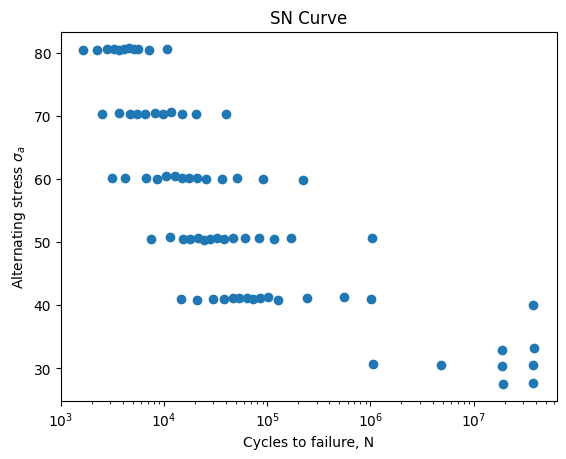

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import drive

from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# File path in Google Drive
file_path = '/content/drive/My Drive/Machine Learning Engineering/plot-data.csv'  # Adjust this path based on where you uploaded the file
df = pd.read_csv(file_path)

second_column_name = df.columns[1]
plt.scatter(df['x'].to_numpy(), df[second_column_name].to_numpy())  # Access using the actual column name

plt.xlabel('Cycles to failure, N')
plt.ylabel('Alternating stress $\sigma_a$')
plt.title('SN Curve')
plt.xscale('log')
plt.show()


In [5]:
df['sample_type'] = 0
df.loc[df['x'] > 1e7, 'sample_type'] = 1
df

,x,y,sample_type
0,1.651557e+03,80.445575,0
1,2.224435e+03,80.481164,0
2,2.763885e+03,80.500145,0
3,3.293096e+03,80.533955,0
4,3.632336e+03,80.466336,0
...,...,...,...
69,3.753601e+07,39.990865,1
70,1.903444e+07,30.304702,1
71,3.784354e+07,30.464853,1
72,1.933848e+07,27.455202,1


Training set size: (37, 1) (37,)
Testing set size: (37, 1) (37,)


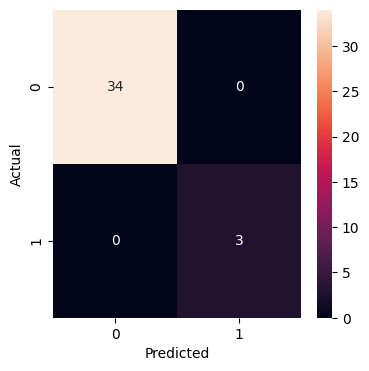

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00         3

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



In [9]:
X = df[['x']].values
y = df['sample_type'].values

# split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)

print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

knn = KNeighborsClassifier(n_neighbors=3, p=2)
knn.fit(X_train, y_train)

knn.score(X_test, y_test)
knn.predict(X_test)

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred))